#PART1 FIRST DRAFT#

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [0]:
df = pd.read_csv("winequality-red.csv" , sep=";")

In [57]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [64]:
columns_list = df.columns

for columns in columns_list:
  print(pd.DataFrame(df[columns].isna())[columns].value_counts())
  print(pd.DataFrame(df[columns].isnull())[columns].value_counts())
  print("-------")

False    1599
Name: fixed acidity, dtype: int64
False    1599
Name: fixed acidity, dtype: int64
-------
False    1599
Name: volatile acidity, dtype: int64
False    1599
Name: volatile acidity, dtype: int64
-------
False    1599
Name: citric acid, dtype: int64
False    1599
Name: citric acid, dtype: int64
-------
False    1599
Name: residual sugar, dtype: int64
False    1599
Name: residual sugar, dtype: int64
-------
False    1599
Name: chlorides, dtype: int64
False    1599
Name: chlorides, dtype: int64
-------
False    1599
Name: free sulfur dioxide, dtype: int64
False    1599
Name: free sulfur dioxide, dtype: int64
-------
False    1599
Name: total sulfur dioxide, dtype: int64
False    1599
Name: total sulfur dioxide, dtype: int64
-------
False    1599
Name: density, dtype: int64
False    1599
Name: density, dtype: int64
-------
False    1599
Name: pH, dtype: int64
False    1599
Name: pH, dtype: int64
-------
False    1599
Name: sulphates, dtype: int64
False    1599
Name: sulphates, d

Outlier kontrol , fakat hiçbir değeri çıkarmıcaz çünkü bunlar gerçek veriler.

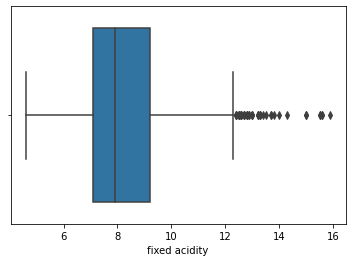

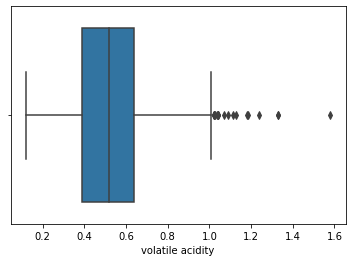

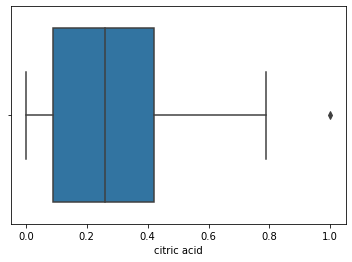

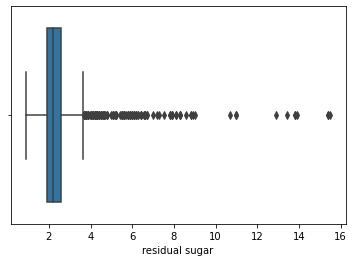

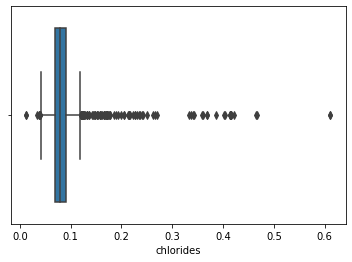

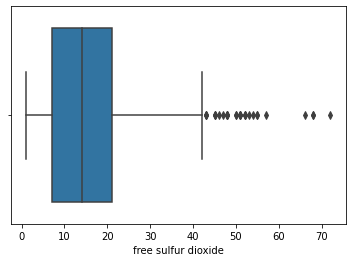

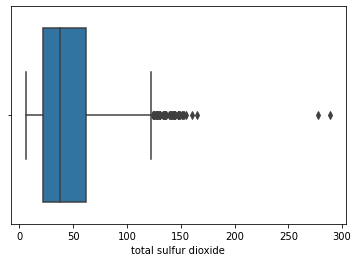

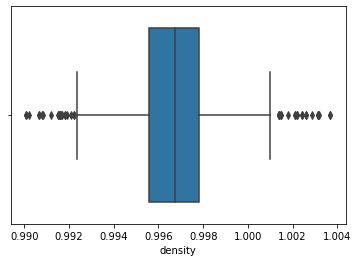

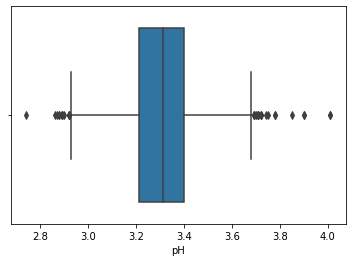

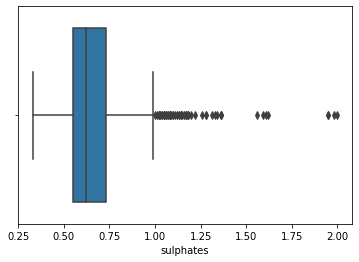

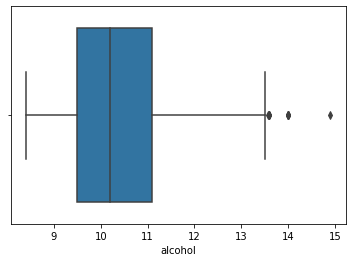

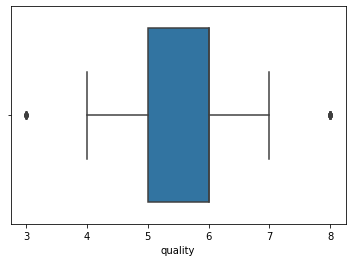

In [76]:
import seaborn as sns
from matplotlib import pyplot as plt
for columns in columns_list:
  xd = sns.boxplot(df[columns])
  plt.show(xd)

In [0]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [151]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [152]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [0]:
from sklearn.model_selection import train_test_split      #veriyi ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler         #standartlaştırma
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
y_list , y_count = [classes for classes in y['quality'].value_counts().index] , len(y['quality'].value_counts().index)

In [156]:
y_list , y_count  #sınıflandırma outputları ve toplam sayısı

([5, 6, 7, 4, 8, 3], 6)

In [157]:
from sklearn.neighbors import KNeighborsClassifier  #Nonlinear classifier KNN,  KernelSVM 
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)

In [159]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  5,  6,  0,  0],
       [ 0,  0, 96, 37,  1,  1],
       [ 0,  0, 48, 85,  9,  0],
       [ 0,  0,  6,  6, 13,  2],
       [ 0,  0,  0,  1,  2,  0]])

Bu matrix'ten gördüğümüz üzere classifier aralığını büyütmek , yani classifier output'unu azaltmak , yani 3,4,5,6,7,8 diye sınıflandırmak yerine 3-4 , 5-6 , 7-8 diye sınıflandırmak modelimizi güçlendiricektir.

#PART2 RECONSTRUCTION#

In [0]:
y['quality'] = np.where(y['quality']==3 , 3.5 , y['quality'])
y['quality'] = np.where(y['quality']==4 , 3.5 , y['quality'])
y['quality'] = np.where(y['quality']==5 , 5.5 , y['quality'])
y['quality'] = np.where(y['quality']==6 , 5.5 , y['quality'])
y['quality'] = np.where(y['quality']==7 , 7.5 , y['quality'])
y['quality'] = np.where(y['quality']==8 , 7.5 , y['quality'])

In [190]:
y['quality'].value_counts()

5.5    1319
7.5     217
3.5      63
Name: quality, dtype: int64

y değerlerimiz float olduğu için kategorilendirme çalışmıcaktır. LabelEncoder Uygulayalım.



In [0]:
y = y.values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [196]:
np.unique(y, return_index=False , return_counts=True)

(array([0, 1, 2]), array([  63, 1319,  217]))

*  3-4 = 0
*  5-6 = 1
*  7-8 = 2

In [0]:
from sklearn.model_selection import train_test_split      #veriyi ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler         #standartlaştırma
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier  #Nonlinear classifier KNN,  KernelSVM 
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train);

In [0]:
def sonuclar(X):
  if str(X) == str(X_test):
    y_true = y_test
  elif str(X) == str(X_train):
    y_true = y_train
  elif str(X) == str(X_test_lda):
    y_true = y_test
  elif str(X) == str(X_train_lda):
    y_true = y_train
    
  y_pred = classifier.predict(X)
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(y_true, y_pred)
  print(cm)
  true = cm[0][0] + cm[1][1] + cm[2][2]
  rate = true/np.sum(cm)*100
  print("True Prediction Rate: %{}".format(rate))

In [285]:
sonuclar(X_test)

[[  0  13   0]
 [  0 263  14]
 [  0  13  17]]
True Prediction Rate: %87.5


Test Datamızda %87.5 ile doğru tahmin yaptık. Birde train datamıza bakalım


In [286]:
sonuclar(X_train)

[[  8  41   1]
 [  6 993  43]
 [  0  86 101]]
True Prediction Rate: %86.16106333072713


%86 başarı. Bu da demektir ki test ve train sonuçları birbirine çok yakın olduğu için modelimiz overfitting olmamış.

#PART3 K-NN Yerine KernelSVM kullanmak#

In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train);

In [288]:
sonuclar(X_test)

[[  0  13   0]
 [  0 272   5]
 [  0  21   9]]
True Prediction Rate: %87.8125


Sonuç %87.81.

In [289]:
sonuclar(X_train)

[[   1   48    1]
 [   0 1020   22]
 [   0  112   75]]
True Prediction Rate: %85.69194683346365


Test ve Train arasındaki fark açıldı. KNN'in KernelSVM'den daha iyi başarı verdiğini söylemek mümkün.

#PART4 LDA(Linear Discriminant Analysis)#

In [297]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = None)
lda.fit_transform(X_train, y_train)
lda.transform(X_test)
lda.explained_variance_ratio_

array([0.82778974, 0.17221026])

Bunun anlamı 11 sütunluk verimizi 1 sütuna indirirsek bilgilerimizin %82'sini ,  2 sütuna indirgersek bilgilerimizin %100 ünü korucağımız anlamına geliyor. 2 Sütuna indirebiliriz.

In [0]:
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [302]:
X_train_lda[:5]   #ilk 5 satır

array([[-0.67189699,  0.5422552 ],
       [ 0.59045146, -0.61980484],
       [ 1.27442424,  0.34345541],
       [ 1.30039754,  1.86247664],
       [-0.56624315,  1.13081415]])

X_train_lda 'yı öğretelim KNN ile.

In [0]:
from sklearn.neighbors import KNeighborsClassifier  #Nonlinear classifier KNN,  KernelSVM 
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_lda, y_train);  

In [332]:
sonuclar(X_test_lda)

[[  0  12   1]
 [  2 251  24]
 [  0  14  16]]
True Prediction Rate: %83.4375


In [333]:
sonuclar(X_train_lda)

[[  4  45   1]
 [  7 996  39]
 [  1  84 102]]
True Prediction Rate: %86.16106333072713


11 sütunluk verimizi 2 sütuna düşürerek hesaplama yükünü oldukça azalttık. Buna karşın modelimizin doğruluğundan çok az pay verdik.